In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 9/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.692

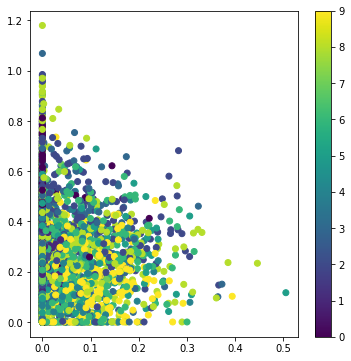

In [14]:
import matplotlib.pyplot as plt
encoder=Model(input_img, encoded)
x_test_encoded = encoder.predict(x_test, batch_size=256)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 10], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# Ejercicio
Utiliza algun método de clustering de ML para hacer un clustering de las variables latentes. sabes que hay 10 clases, pero, ¿te sale que necesitas 10 clusters=
